# EDA outlier detection techniques

Will check LocalOutlierFactor, IsolationForest, DBSCAN, and Single Class
SVM.

In [7]:
from pathlib import Path
import dotenv
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from credit_fraud.class_purity import\
    greater_than_tail_class_purity,\
    less_than_tail_class_purity
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [3]:
PROJECT_PATH = Path(dotenv.find_dotenv()).absolute().parent

### Load Data

In [4]:
df = pd.read_parquet(
    PROJECT_PATH.joinpath('data', 'eda-pack', 'df_eda.pqt')
)
y_col = 'Class'
feature_cols = [col for col in df.columns if col != y_col]
standardizer = StandardScaler()
df[feature_cols] = standardizer.fit_transform(df[feature_cols])

### Investigating Local Outlier Factor

In [5]:
import joblib

In [6]:
outlier_factor: LocalOutlierFactor = joblib.load(
    PROJECT_PATH.joinpath(
        'outputs', 'eda', 'local-outlier-factor.joblib'
    )
)
outlier_factor

LocalOutlierFactor(algorithm='ball_tree', n_jobs=-1)

In [8]:
purity_scores = less_than_tail_class_purity(
    outlier_factor.negative_outlier_factor_,
    df['Class'],
    1,
    np.percentile(
        outlier_factor.negative_outlier_factor_,
        np.linspace(0, 100, 1000)
    )
)
purity_scores.shape

C:\Users\yawlc.000\OneDrive\Documents\JOSEPH HUARD-COX\Data_Science_Projects\credit-card-fraud\src\credit_fraud\class_purity\_tail_purity.py:60: RuntimeWarning: invalid value encountered in scalar divide
  purity.append([el, (y_in_tail).sum() / len(y_in_tail)])


(1000, 2)

Text(0.5, 1.0, 'Investigating Negative Outlier Factor as a Threshold')

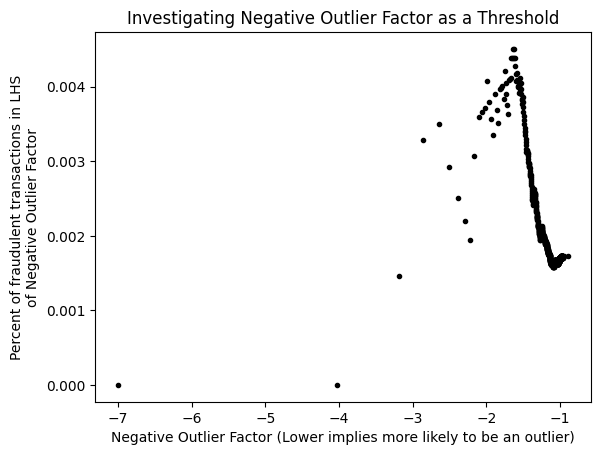

In [12]:
plt.plot(purity_scores[:, 0], purity_scores[:, 1], '.k')
plt.xlabel(
    'Negative Outlier Factor (Lower implies more likely to be an outlier)'
)
plt.ylabel(
    'Proportion of fraudulent transactions in LHS\nof Negative Outlier Factor'
)
plt.title('Investigating Negative Outlier Factor as a Threshold')

### Investigating Isolation Forests

In [14]:
iso_forest = IsolationForest(n_jobs = -1, random_state = 19)
iso_forest = iso_forest.fit(df[feature_cols])

C:\Users\yawlc.000\OneDrive\Documents\JOSEPH HUARD-COX\Data_Science_Projects\credit-card-fraud\src\credit_fraud\class_purity\_tail_purity.py:60: RuntimeWarning: invalid value encountered in scalar divide
  purity.append([el, (y_in_tail).sum() / len(y_in_tail)])


Text(0.5, 1.0, 'Investigating Isolation Forest Decision score as a Threshold')

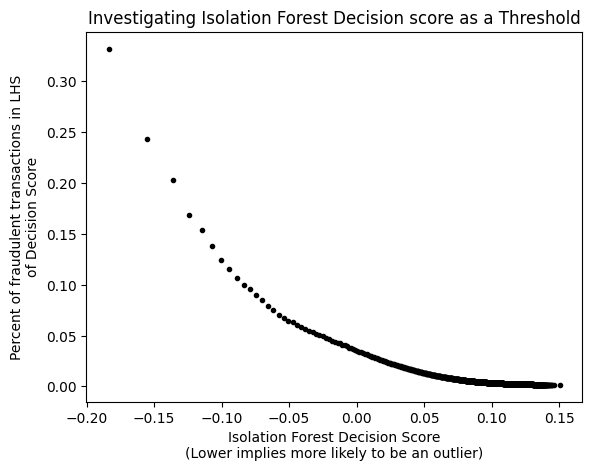

In [16]:
iso_scores = iso_forest.decision_function(df[feature_cols])
iso_purity_scores = less_than_tail_class_purity(
    iso_scores,
    df['Class'],
    1,
    np.percentile(
        iso_scores,
        np.linspace(0, 100, 1000)
    )
)
plt.plot(iso_purity_scores[:, 0], iso_purity_scores[:, 1], '.k')
plt.xlabel(
    '\n'.join(
        [
            'Isolation Forest Decision Score',
            '(Lower implies more likely to be an outlier)'
        ]
    )
)
plt.ylabel(
    'Proportion of fraudulent transactions in LHS\nof Decision Score'
)
plt.title('Investigating Isolation Forest Decision score as a Threshold')

### Investigating DBSCAN

In [17]:
from credit_fraud.raincloud import pyplot_cloud

In [23]:
# Get distribution of nearest neighbour distance
outlier_factor._distances_fit_X_[:, 0] # nearest neighbour distance

array([0.25039018, 0.53077449, 2.3437838 , ..., 3.32492502, 0.        ,
       0.34399769])